<a href="https://colab.research.google.com/github/sassymag/machinelearning/blob/main/MLwithAutodiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use **Pytorch** or **tf** to find the slope of $y = x^2 + 2x + 2$ where $x = 2$

**Autodiff with Pytorch**

In [105]:
import torch
import matplotlib.pyplot as plt
import tensorflow as tf

In [69]:
x = torch.tensor(2.0)

In [70]:
x.requires_grad_()

tensor(2., requires_grad=True)

In [71]:
y = x**2 + 2*x + 2
y

tensor(10., grad_fn=<AddBackward0>)

In [72]:
y.backward() # use pytorch autodiff

In [73]:
x.grad

tensor(6.)

**Autodiff with TensorFlow**

In [74]:
import tensorflow as tf

In [75]:
x = tf.Variable(2.0)

In [76]:
with tf.GradientTape() as t:
  t.watch(x)
  y = x**2 + 2*x + 2

In [77]:
t.gradient(y, x) # use tf autodiff

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

2. Use the Regression in PyTorch notebook to simulate a new linear relationship between $y$ and $x$, and then fit the parameters $m$ and $b$.

In [78]:
# stimulate x
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [79]:
y = -2.5*x + 5 + torch.normal(mean=torch.zeros(8), std=0.5)
y

tensor([  4.6454,   2.0965,  -0.0830,  -1.6494,  -4.5687,  -7.8250,  -9.9723,
        -11.9584])

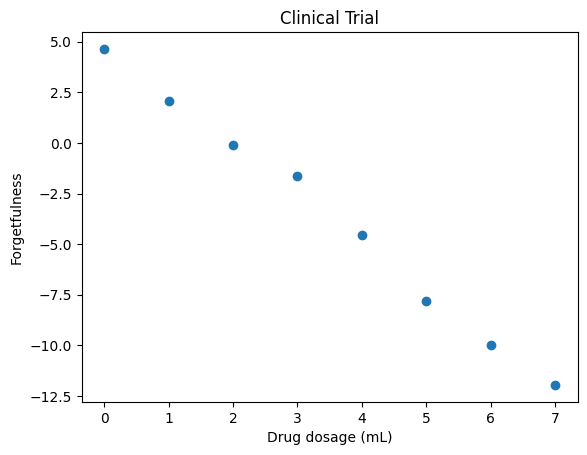

In [80]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

In [81]:
# slope parameter m
m = torch.tensor([0.8]).requires_grad_()
m

tensor([0.8000], requires_grad=True)

In [82]:
# slope parameter b
b = torch.tensor([0.2]).requires_grad_()
b

tensor([0.2000], requires_grad=True)

In [83]:
# regression func
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [84]:
# regression plot
def regression_plot(my_x, my_y, my_m, my_b):

    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

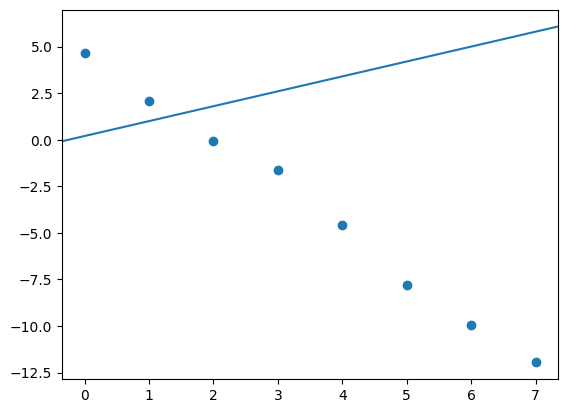

In [85]:
regression_plot(x, y, m, b)

In [86]:
# step 1 - Forward pass
yhat = regression(x, m, b)
yhat

tensor([0.2000, 1.0000, 1.8000, 2.6000, 3.4000, 4.2000, 5.0000, 5.8000],
       grad_fn=<AddBackward0>)

In [87]:
# step 2 - compare yhat with true y to calculate cost C

def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [88]:
C = mse(yhat, y)
C

tensor(98.7751, grad_fn=<DivBackward0>)

In [89]:
# step 3 use autodiff to calculate gradient of C w.r.t parameters

C.backward()

In [90]:
m.grad

tensor([80.3901])

In [91]:
b.grad

tensor([13.3287])

In [94]:
# step 4 - Gradient descent

optimizer = torch.optim.SGD([m, b], lr=0.01)
optimizer.step()

In [95]:
# confirm

m

tensor([-0.0039], requires_grad=True)

In [96]:
b

tensor([0.0667], requires_grad=True)

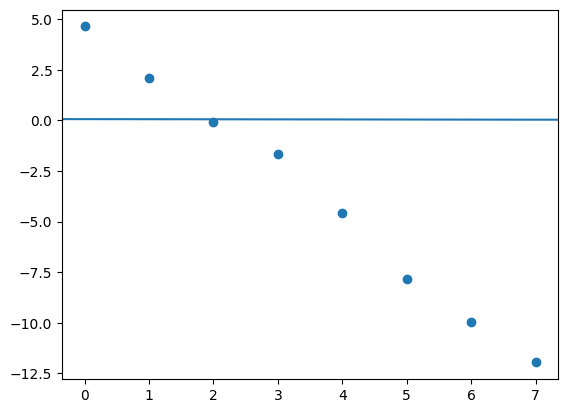

In [97]:
regression_plot(x, y, m, b)

In [99]:
# confirm cost has decreased

C = mse(regression(x, m, b), y)
C

tensor(44.4501, grad_fn=<DivBackward0>)

In [100]:
epochs = 1000
for epoch in range(epochs):

  optimizer.zero_grad()

  yhat = regression(x, m, b)
  C = mse(yhat, y)

  C.backward()
  optimizer.step()

  print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 44.5, m grad 51.3, b grad 7.43
Epoch 1, cost 22.4, m grad 32.8, b grad 3.69
Epoch 2, cost 13.5, m grad 21.1, b grad 1.32
Epoch 3, cost 9.83, m grad 13.6, b grad -0.181
Epoch 4, cost 8.3, m grad 8.86, b grad -1.13
Epoch 5, cost 7.63, m grad 5.84, b grad -1.73
Epoch 6, cost 7.31, m grad 3.92, b grad -2.1
Epoch 7, cost 7.14, m grad 2.69, b grad -2.33
Epoch 8, cost 7.02, m grad 1.91, b grad -2.48
Epoch 9, cost 6.92, m grad 1.42, b grad -2.56
Epoch 10, cost 6.84, m grad 1.1, b grad -2.61
Epoch 11, cost 6.76, m grad 0.898, b grad -2.63
Epoch 12, cost 6.68, m grad 0.768, b grad -2.64
Epoch 13, cost 6.61, m grad 0.684, b grad -2.64
Epoch 14, cost 6.53, m grad 0.63, b grad -2.64
Epoch 15, cost 6.46, m grad 0.594, b grad -2.63
Epoch 16, cost 6.39, m grad 0.57, b grad -2.62
Epoch 17, cost 6.32, m grad 0.554, b grad -2.61
Epoch 18, cost 6.25, m grad 0.543, b grad -2.59
Epoch 19, cost 6.18, m grad 0.534, b grad -2.58
Epoch 20, cost 6.11, m grad 0.528, b grad -2.57
Epoch 21, cost 6.04,

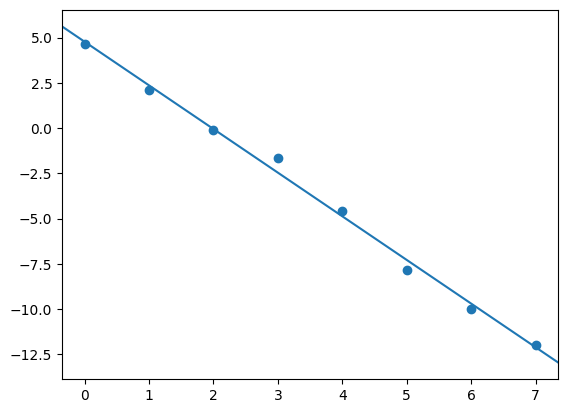

In [101]:
regression_plot(x, y, m, b)

In [102]:
m.item()

-2.4101598262786865

In [103]:
b.item()

4.766754627227783

**Regression in TensorFlow**

In [109]:
# simulate x
x_tf = tf.Variable([0, 1, 2, 3, 4, 5, 6, 7.])
x_tf

<tf.Variable 'Variable:0' shape=(8,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32)>

In [110]:
# simulate y
y_tf = -2.5*x_tf + 5 + tf.random.normal(shape = [8], mean = 0, stddev=0.5)
y_tf

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([  4.43124   ,   2.7677248 ,  -0.04552202,  -1.7918533 ,
        -5.292434  ,  -7.8666763 , -10.044069  , -12.562056  ],
      dtype=float32)>

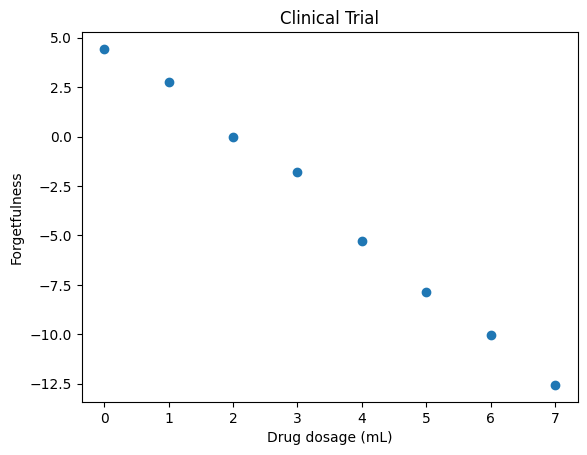

In [111]:
# plotting
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x_tf, y_tf)

In [112]:
# TF's analog of .requires_grad_() from PyTorch
m_tf = tf.stop_gradient([0.8])
b_tf = tf.stop_gradient([0.2])

In [113]:
# regression func
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [114]:
# regression plot
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b)
    y_max = regression(x_max, my_m, my_b)

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

In [115]:
# step 1 - farward pass
y_hat_tf = regression(x_tf, m_tf, b_tf)

In [116]:
# step 2 - compare y_hat with true y to calculate C
def mse_tf(my_yhat, my_y):
    sigma = tf.reduce_sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [117]:
# calculating C
C_tf = mse_tf(y_hat_tf, y_tf)

In [118]:
# backprop
with tf.GradientTape() as t:
    t.watch(x_tf) # track forward pass
    y = y_tf

In [119]:
# use TF autodiff
t.gradient(y_tf, x_tf)

In [120]:
# step 4
optimizer_tf = tf.keras.optimizers.SGD(learning_rate=0.01)

In [121]:
# using the for loop to minimize the cost itertatively in 1000 epochs
epochs = 1000
for epoch in range(epochs):

    #optimizer.zero_grad() # Reset gradients to zero; else they accumulate

    y_hat_tf = regression(x_tf, m_tf, b_tf) # Step 1
    C_tf = mse_tf(y_hat_tf, y_tf) # Step 2

    with tf.GradientTape() as t:
        t.watch(x_tf) # track forward pass
        y = y_tf # Step 3

    t.gradient(y_tf, x_tf) # use TF autodiff

    optimizer_tf = tf.keras.optimizers.SGD(learning_rate=0.01) # Step 4

    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch,
                                                           tf.print(C_tf),
                                                           tf.print(m_tf),
                                                           tf.print(b_tf)))

103.546844
[0.8]
[0.2]
Epoch 0, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 1, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 2, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 3, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 4, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 5, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 6, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 7, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 8, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 9, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 10, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 11, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 12, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 13, cost None, m grad None, b grad None
103.546844
[0.8]
[0.2]
Epoch 14, cost None, 